# MFI (money flow index)

FF-18	MFI (money flow index, which evaluates the selling and buying pressure with the help of trading price and volume)

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.  
Unlike conventional oscillators such as the Relative Strength Index (RSI), the Money Flow Index incorporates both price and volume data, as opposed to just price. For this reason, some analysts call MFI the volume-weighted RSI. 
https://www.investopedia.com/terms/m/mfi.asp


```
Momentum Indicators
MFI                  Money Flow Index
```  
https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html


```
MFI - Money Flow Index
NOTE: The MFI function has an unstable period.

real = MFI(high, low, close, volume, timeperiod=14)
```

In [1]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

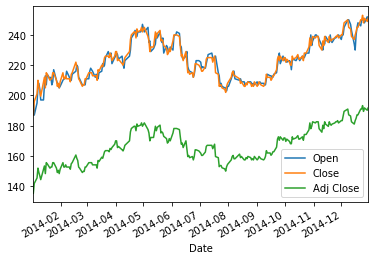

In [2]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

In [3]:

from ta import add_all_ta_features
from ta.utils import dropna

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

mfi = MFI(inputs)
daily = add_all_ta_features(daily, open="Open", high="High", low="Low", close="Close", volume="Volume")

daily.loc[:,("MFI")] = mfi.tolist()
daily.tail()



/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,MFI
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,-5.005559e+06,213623400.0,0.222698,6.340093e+06,...,8.317647,243.129319,2.016129,4.009376,11.660023,-7.650647,1.200000,1.192857,35.294118,68.859432
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,-5.596826e+06,211849600.0,0.194908,4.167365e+06,...,9.008824,243.239696,-0.800000,-2.532403,8.821538,-11.353940,-1.976285,-1.996074,32.620321,65.494617
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,-3.144126e+06,214302300.0,0.206448,4.623184e+06,...,9.029412,244.149666,2.448980,-7.243628,5.608505,-12.852132,1.209677,1.202419,34.224599,62.774318
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,-4.513626e+06,212019800.0,0.188726,3.310587e+06,...,9.173529,244.718414,2.049180,-11.512135,2.184377,-13.696512,-0.796813,-0.800004,33.155080,59.335561
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,-3.132066e+06,214322400.0,0.217800,3.495531e+06,...,8.258824,245.400251,5.020921,-15.084623,-1.269423,-13.815199,0.803213,0.800004,34.224599,64.225378


# Plot of MFI on the original time-series

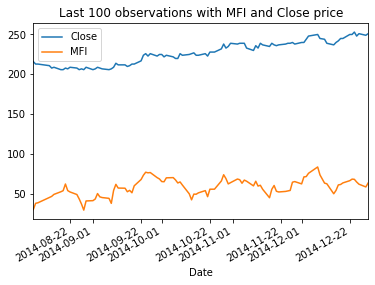

In [4]:
daily[['Close','MFI']][-100:].plot(title="Last 100 observations with MFI and Close price")

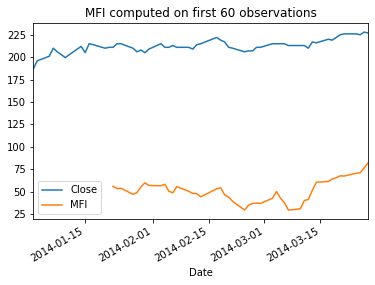

In [5]:
daily[['Close','MFI']][:60].plot(title="MFI computed on first 60 observations")

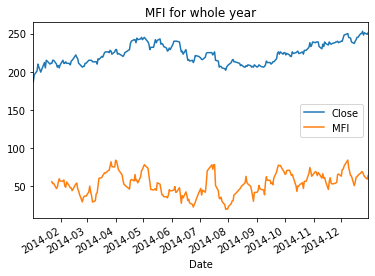

In [6]:
daily[['Close','MFI']].plot(title="MFI for whole year")

In [7]:
daily.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
     

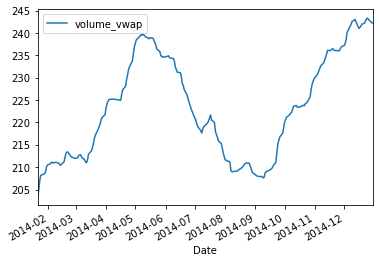

In [8]:
daily[['volume_vwap']].dropna().plot()

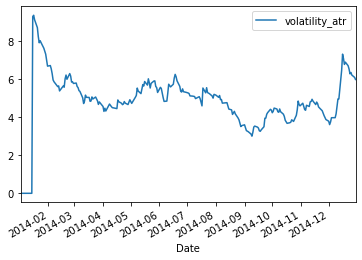

In [9]:
daily[['volatility_atr']].dropna().plot()

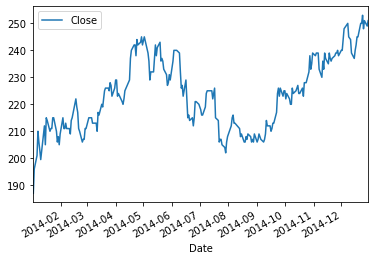

In [10]:
daily[['Close']].dropna().plot()